<a href="https://colab.research.google.com/github/vk1438/Flight_fare_prediction/blob/main/flight_fare_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:

data=pd.read_excel('Flight_Fare.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.dropna(inplace=True)

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
data=data.drop('Additional_Info',axis=1)

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


In [12]:
data.shape

(10682, 10)

In [13]:
data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.day
data['journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.month
#data['journey_week']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.week

In [14]:
data=data.drop('Date_of_Journey',axis=1)

In [15]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3


In [16]:
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute




In [17]:
data=data.drop('Dep_Time',axis=1)

In [18]:
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute

In [19]:
data=data.drop('Arrival_Time',axis=1)

In [20]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35


In [21]:
data=data.drop('Route',axis=1)

In [22]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [23]:
data.replace({"non-stop":0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [24]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


In [25]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  # Extracts only minute fron the duration

In [26]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins


In [27]:
data=data.drop('Duration',axis=1)

In [28]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


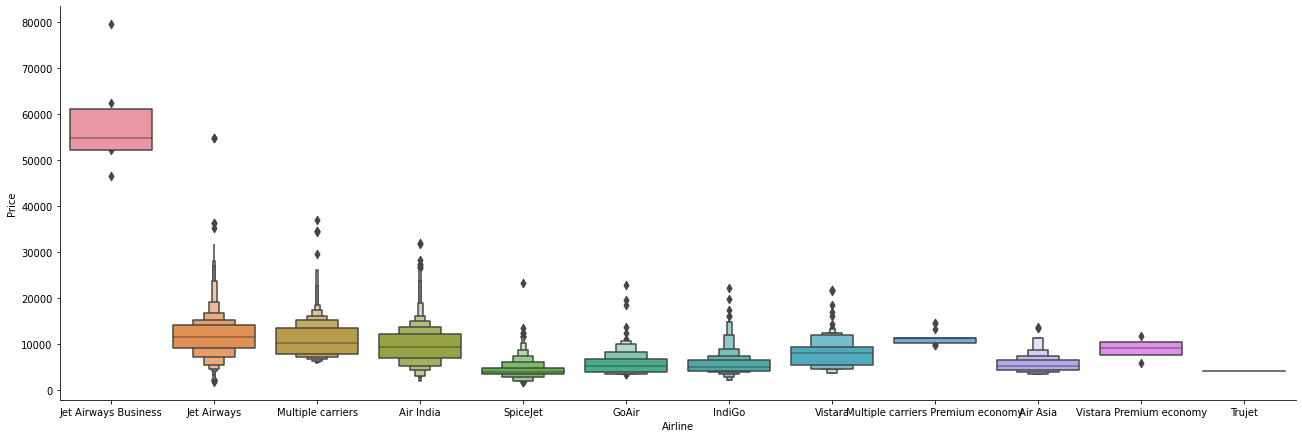

In [29]:
# airline vs price
sns.catplot(x="Airline",y="Price",data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

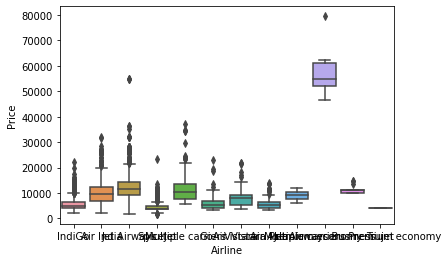

In [30]:

sns.boxplot(x='Airline',y='Price',data=data)

<function matplotlib.pyplot.show>

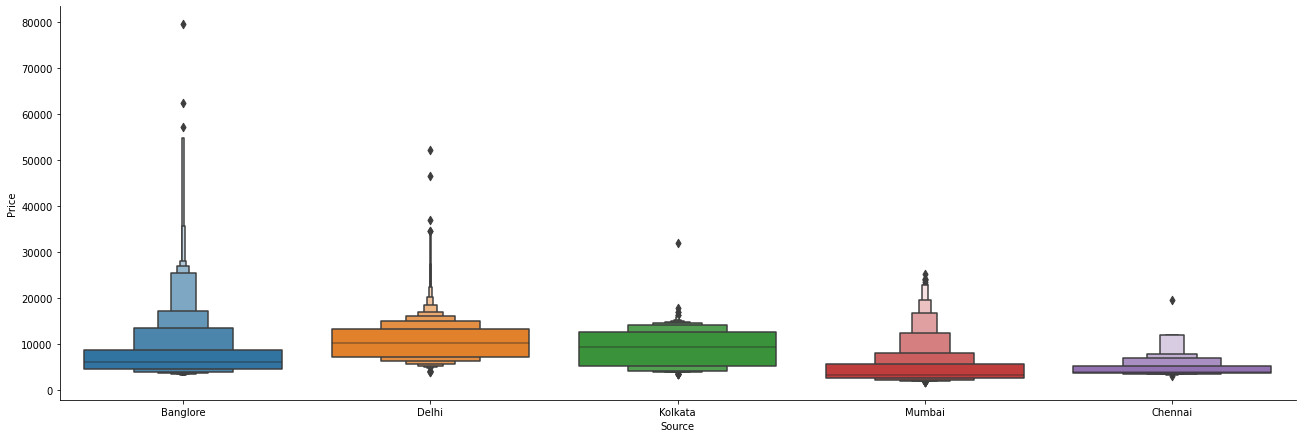

In [31]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show>

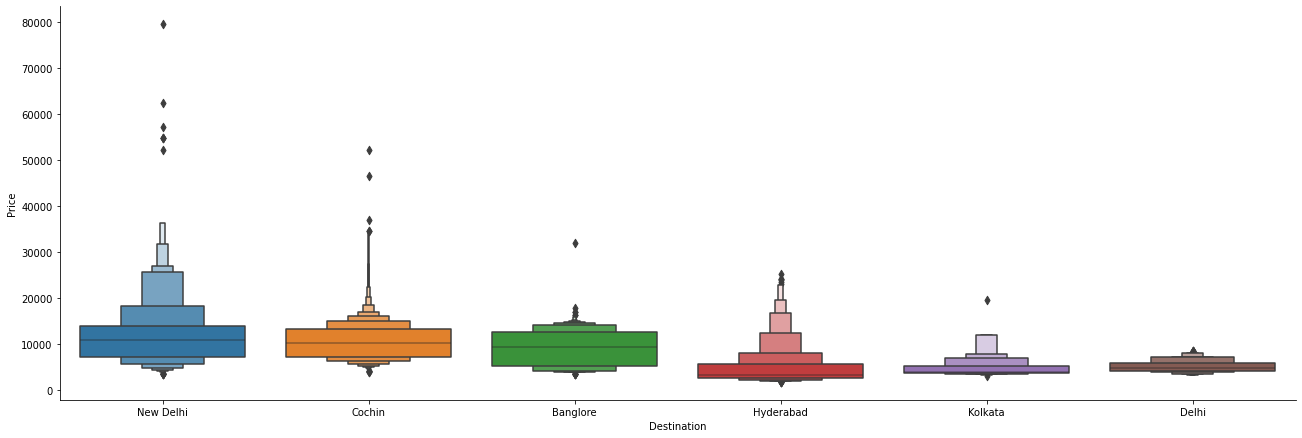

In [32]:
# Desination vs price
sns.catplot(y='Price',x='Destination',data= data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [33]:
encode=LabelEncoder() # label encoding

In [34]:
data.Airline=encode.fit_transform(data.Airline)
data.Source=encode.fit_transform(data.Source)
data.Destination=encode.fit_transform(data.Destination)

In [35]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45


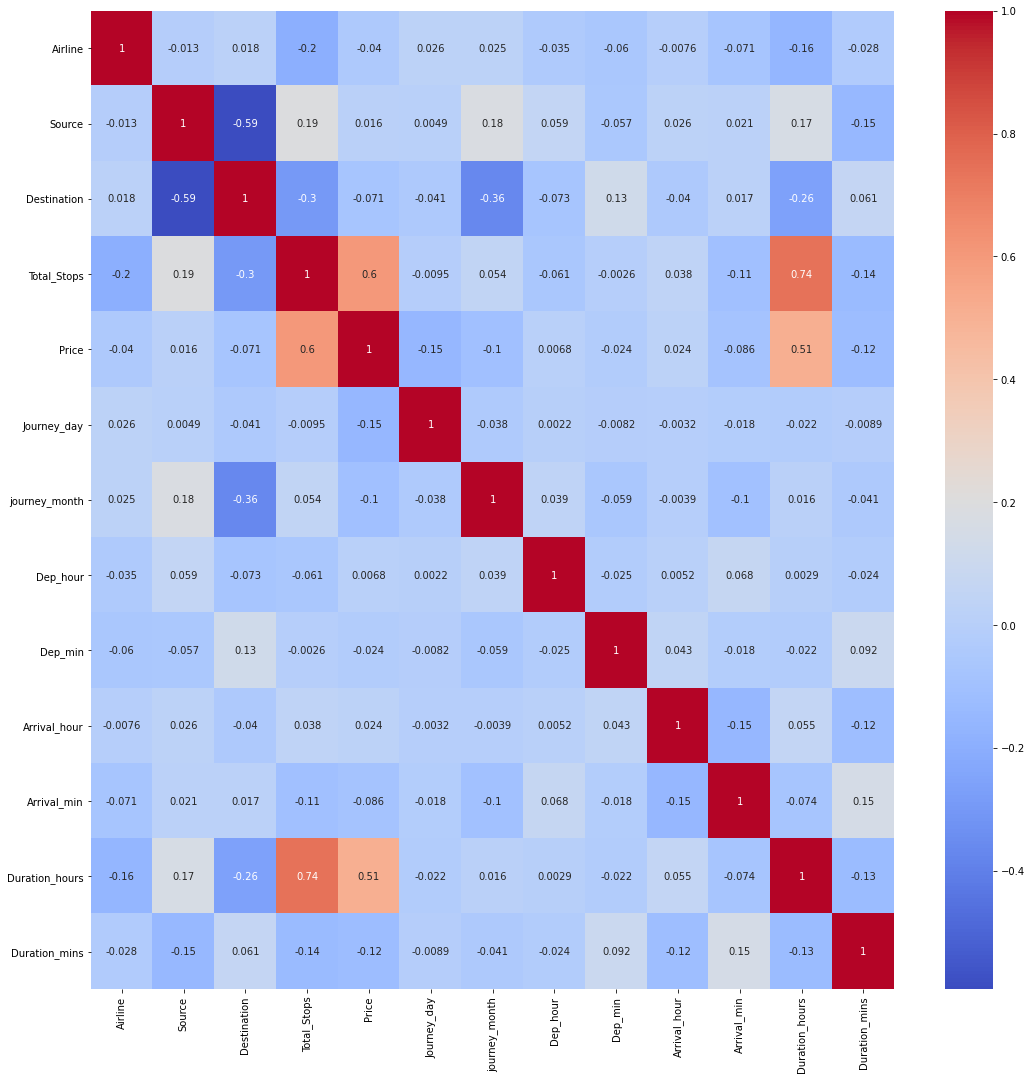

In [36]:
# heat map
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [37]:
# splitting the data
y=data[['Price']]

In [38]:
y

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [39]:
x=data.drop('Price',axis=1)

In [40]:
x

,Airline,Source,Destination,Total_Stops,Journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,24,3,22,20,1,10,2,50
1,1,3,0,2,1,5,5,50,13,15,7,25
2,4,2,1,2,9,6,9,25,4,25,19,0
3,3,3,0,1,12,5,18,5,23,30,5,25
4,3,0,5,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,9,4,19,55,22,25,2,30
10679,1,3,0,0,27,4,20,45,23,20,2,35
10680,4,0,2,0,27,4,8,20,11,20,3,0
10681,10,0,5,0,1,3,11,30,14,10,2,40


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [42]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8545, 12), (8545, 1), (2137, 12), (2137, 1))

In [43]:

# linear regression
lr_model=LinearRegression()

In [44]:
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred=lr_model.predict(x_test)

In [46]:
y_pred

array([[13441.86043773],
       [ 9511.02160203],
       [11020.3082033 ],
       ...,
       [ 8458.30427291],
       [ 9026.58090005],
       [ 9118.36808645]])

In [47]:
y_test

,Price
6075,16655
3544,4959
9291,9187
5032,3858
2483,12898
...,...
9797,7408
9871,4622
10063,7452
8802,8824


In [48]:
lr_model.score(x_train,y_train)

0.4359733167832309

In [49]:
lr_model.score(x_test,y_test)

0.4381543229086622

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr=RandomForestRegressor()

In [52]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
rfr_pred=rfr.predict(x_test)

In [54]:
rfr.score(x_test,y_test)

0.7861391842349168

In [55]:
rfr.score(x_train,y_train)

0.9541321545064348

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
mean_absolute_error(y_test,rfr_pred)

1198.6645303532453

In [58]:
mean_squared_error(y_test,rfr_pred)

4611278.95505791

In [59]:
RMSE=np.sqrt(mean_squared_error(y_test,rfr_pred))

In [60]:
RMSE

2147.3888690821486

#Hyperprameter tuning

There are two types of hyperparameter tuning

1.RandomizedSearchCV    
2.GridSearchCV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
random_grid={'n_estimators':[100,200,300,400,500,600,700,800],'max_features':['auto','sqrt']}

In [63]:
random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=10,verbose=3,n_jobs=1)

In [64]:
random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=100, max_features=sqrt .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_features=sqrt, score=-3078851.752, total=   1.1s
[CV] n_estimators=100, max_features=sqrt .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=100, max_features=sqrt, score=-3612467.533, total=   1.1s
[CV] n_estimators=100, max_features=sqrt .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=100, max_features=sqrt, score=-3320032.825, total=   1.1s
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=-4003091.124, total=   1.1s
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=-5151024.919, total=   1.0s
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=-4721195.665, total=   1.0s
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=-7289795.039, total=   1.1s
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=-4761736.761, total=   1.0s
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=-3889694.189, total=   1.1s
[CV] n_estimators=100, max_features

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [65]:
random.best_params_

{'max_features': 'auto', 'n_estimators': 700}

In [66]:
prediction=random.predict(x_test)

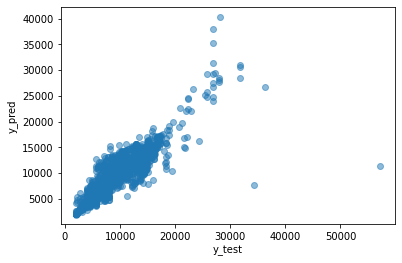

In [67]:
# plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [68]:
print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 1191.6768442910713
MSE: 4547979.9236993
RMSE: 2132.599335013331


In [69]:
r2_score(y_test,prediction)

0.7890748518914232

In [70]:
random.predict([[3,0,5,0,40,4,22,20,2,10,3,40]])

array([5876.87690476])

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
tree=DecisionTreeRegressor()

In [73]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
tree_pred=tree.predict(x_test)

In [75]:
tree.score(x_train,y_train)

0.9692484150527354

In [76]:
tree.score(x_test,y_test)

0.7239397886953778